<a href="https://colab.research.google.com/github/katemovlyan/hw_hillel_ml/blob/main/Hillel_home_work4_regression_kate_movlian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Лабораторная работа 3. **REGRESSION** 📈

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Часть 1. Работа с датасетами. Базовые статистики и вероятности. 📈

В этом разделе Вам будет предложенно решить несколько практических задач. Большинство из них, подразумевают написание кода с использование библиотек [```numpy```](https://numpy.org/doc/stable/),  [```scipy```](https://docs.scipy.org/doc/scipy/reference/) и  [```pandas```](https://pandas.pydata.org/docs/) .   Решение каждой задачи подразумевает аккуратное оформление кода и комментариев к результатам его выполнения. Оформление комментариев должно производиться в текстовых ячейках ноутбука с использованием синтаксиса [LaTeX](https://en.wikibooks.org/wiki/LaTeX/Basics) для оформления формул.

В данной работе мы будем работать с двумя датасетами ```ceo.xls``` и ```telco.txt```. Вы можете найти их прикрепленными к домашнему заданию в LMS.



**Перед отправкой решений на проверку, добавьте в название файла свое имя и фамилию.**

Пример: ``` Hillel_home_work4_regression_philipp_kofman.ipynb```

Если вы нашли грамматические или любые другие ошибки - сообщите мне о них в приватных сообщениях 😇

Описание датасета ```ceo.xls```:


```
salary = 1999 salary + bonuses in 1000 US$

totcomp = 1999 CEO total compensation

tenure = # of years as CEO (=0 if less than 6 months) age =age of CEO

sales = total 1998 sales revenue of firm i

profits = 1998 profits for firm i

assets = total assets of firm i in 1998

```

Файл ```ceo.xls``` содержит данные о вознаграждениях генерального директора и некоторые дополнительные переменные.


**Задача 1.** Для переменной  ```salary```  рассчитывают общие статистические характеристики: среднее, [10%-trimmed mean](https://www.d.umn.edu/~yqi/stat3611/trimmed.pdf)(10%-усеченное среднее), медиану, верхний и нижний квартили, верхний и нижний 10%-квантили.  Дайте экономическую интерпретацию для каждой из посчитаных характеристик.

Решение задачи оценивается в [1 бал].

In [ ]:
#code
import numpy as np
import pandas as pd
from scipy import stats
# from google.colab import files
# uploaded = files.upload()

ceo_data = pd.read_excel('ceo.xls', sheet_name = 'ceo')
salary = ceo_data["salary"].tolist()

average = sum(salary)/len(salary)
print(f'Average salary: {average}')

salary.sort()
trimmed_values = int(0.1*len(salary))
trimmed_salary = [s for i, s in enumerate(salary) if (i >= trimmed_values and i < len(salary) - trimmed_values)]
trimmed_mean = sum(trimmed_salary)/len(trimmed_salary)
print(f'Manually calculated trimmed mean: {trimmed_mean}')
print(f'Scipy calculated trimmed mean: {stats.trim_mean(salary, 0.1)}')

print(f'Numpy calculated median: {np.median(salary)}')

lower, upper = np.percentile(salary, [25, 75])
print(f'Numpy calculated lower quartile, upper quartile: {lower}, {upper}')

lower, upper = np.percentile(salary, [10, 90])
print(f'Numpy calculated 10% lower quantile, upper quantile: {lower}, {upper}')

Average salary: 2027.5167785234898
Manually calculated trimmed mean: 1710.091922005571
Scipy calculated trimmed mean: 1710.091922005571
Numpy calculated median: 1600.0
Numpy calculated lower quartile, upper quartile: 1084.0, 2347.5
Numpy calculated 10% lower quantile, upper quartile: 750.0, 3384.400000000001


*   Средняя зарплата 2027.52
*   Средняя зарплата с отсечением крайних минимальных и крайних максимальных значений (для характеристики наиболее типичных сумм на рынке) 1710.09
*   Медиана 1600.00 (значение посередине между крайним минимальным и крайним максимальным, 0.5 квантиль, 50% всех значений зарплаты ниже этой суммы)
*   Нижний квартиль 1084.00 (25% всех значений зарплаты ниже этой суммы), верхний - 2347.50 (75% всех значений ниже этой суммы)
*   Нижний квантиль 750.00 (10% всех значений зарплаты ниже этой суммы), верхний - 3384.40 (90% всех значений ниже этой суммы)





**Задача 2.** Постройте и визуализируйте эмпирическую [функцию распределения](https://ru.wikipedia.org/wiki/%D0%A4%D1%83%D0%BD%D0%BA%D1%86%D0%B8%D1%8F_%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D1%8F) переменной ```salary``` - $ \hat{F}(salary)$. Вычислите и объясните, с экономической точки зрения, следующие величины:


1.   $\hat{F}(1000)$ и $1 - \hat{F}(5000)$
2.   $\hat{F}^{-1}(0.2)$ и $\hat{F}^{-1}(0.8)$

Решение задачи оценивается в [2 бала].

**[Разъяснение]** ```salary``` - является набором реализаций некой случайной величины. У случайной величиный есть плотность и функция распределения. Точный  вид этих функций мы не знаем, однако мы можем оценить их. Оценка функции распределения называется [эмпирической функцией распределения](https://nsu.ru/mmf/tvims/chernova/ms/lec/node4.html). Для удобства рекомендуется проилюстрировать все точки на графике.

Text(5, -10, 'S(0.8)')

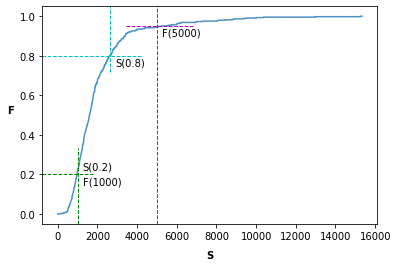

In [ ]:
#code
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from google.colab import files
# uploaded = files.upload()

ceo_data = pd.read_excel('ceo.xls', sheet_name = 'ceo')
salary = ceo_data["salary"].tolist()
# plt.hist(salary, bins=30)
# plt.show()

salary.sort()
s_max = salary[len(salary)-1]
values = range(0, s_max+100, 10)
f_distr = [0 for x in values if x <= salary[0]]
f_distr += [(i + 1)/len(salary) for x in values for i, s in enumerate(salary) if i < len(salary)-1 and s < x and salary[i+1] >= x]
f_distr += [1 for x in values if x > s_max]

plt.plot(values, f_distr, alpha=0.8)
plt.ylabel('F', labelpad=9.0, rotation='horizontal', weight='bold')
plt.xlabel('S', labelpad=9.0, rotation='horizontal', weight='bold')

plt.axhline(0.2, 0, 0.15, color='g', linewidth=1, linestyle='--')
plt.axvline(1000, 0, 0.35, color='g', linewidth=1, linestyle='--')
plt.annotate('S(0.2)', (1000, 0.2), textcoords="offset points", xytext=(5, 5))
plt.annotate('F(1000)', (1000, 0.2), textcoords="offset points", xytext=(5, -10))

plt.axhline(0.95, 0.25, 0.45, color='m', linewidth=1, linestyle='--')
plt.axvline(5000, 0, 1, color='m', linewidth=1, linestyle='--')
plt.annotate('F(5000)', (5000, 0.95), textcoords="offset points", xytext=(5, -10))

plt.axhline(0.8, 0, 0.3, color='c', linewidth=1, linestyle='--')
plt.axvline(2650, 0.7, 1, color='c', linewidth=1, linestyle='--')
plt.annotate('S(0.8)', (2650, 0.8), textcoords="offset points", xytext=(5, -10))



1.   $\hat{F}(1000) = 0.2$ - вероятность того, что ЗП < 1000

  $1 - \hat{F}(5000) = 0.05$ - вкроятность того что ЗП >= 5000
2.   $\hat{F}^{-1}(0.2) = 1000$ - с вероятностью 20% зарплата до 1000 (у 20% работников)

  $\hat{F}^{-1}(0.8)$ - с вероятностью 80% зарплата до ~2650 (у 80% работников)

**Задача 3.** Постройте [гистограмму](https://ru.wikipedia.org/wiki/%D0%93%D0%B8%D1%81%D1%82%D0%BE%D0%B3%D1%80%D0%B0%D0%BC%D0%BC%D0%B0_(%D1%81%D1%82%D0%B0%D1%82%D0%B8%D1%81%D1%82%D0%B8%D0%BA%D0%B0)) и [Box-plot](https://ru.wikipedia.org/wiki/%D0%AF%D1%89%D0%B8%D0%BA_%D1%81_%D1%83%D1%81%D0%B0%D0%BC%D0%B8) распределения переменной ```salary```. Что вы можете сказать о виде распределения? Являются ли статистические характеристики, вычисленные в задаче 1, все еще уместными? Посчитай [cилу скошенности](https://ru.wikipedia.org/wiki/%D0%9A%D0%BE%D1%8D%D1%84%D1%84%D0%B8%D1%86%D0%B8%D0%B5%D0%BD%D1%82_%D0%B0%D1%81%D0%B8%D0%BC%D0%BC%D0%B5%D1%82%D1%80%D0%B8%D0%B8) вашего распределения. В какую сторону присутствует перекос?

Решение задачи оценивается в [2 бала].


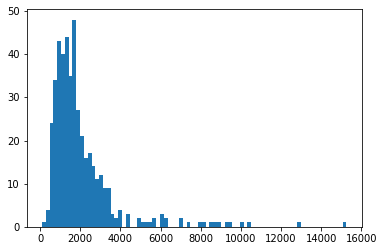

Scipy calculated skew: 3.3910048111568525
Manually calculated skew: 3.3910048111568516


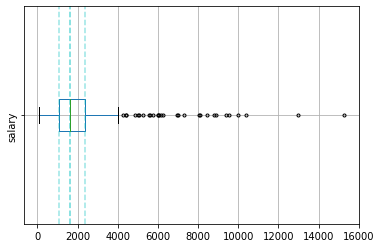

In [ ]:
#code
import numpy as np
import pandas as pd
from scipy.stats import skew
import matplotlib.pyplot as plt
# from google.colab import files
# uploaded = files.upload()

ceo_data = pd.read_excel('ceo.xls', sheet_name = 'ceo')
salary = ceo_data["salary"].tolist()
plt.hist(salary, bins=80)
plt.show()
boxplot = ceo_data.boxplot(column="salary", vert=False, rot=90, sym='.', whis=1.5)
# Numpy calculated median: 1600.0
boxplot.axvline(1600, color='c', alpha=0.6, linestyle='--')
# Numpy calculated lower quartile, upper quartile: 1084.0, 2347.5
boxplot.axvline(1084, color='c', alpha=0.4, linestyle='--')
boxplot.axvline(2347.5, color='c', alpha=0.4, linestyle='--')

print(f'Scipy calculated skewness: {skew(salary)}')
average = sum(salary)/len(salary)
third_moment = 0
second_moment = 0
for s in salary:
  third_moment += np.power(s-average, 3)
  second_moment += np.power(s-average, 2)
third_moment /= len(salary)
second_moment /= len(salary)
skew = third_moment/np.power(second_moment, 1.5)
print(f'Manually calculated skewness: {skew}')

Распределение напоминает нормальное, но не симметричное
Скошенность с правой стороны от пика, коэффициент скошенности положительный
Левый и правый край ящика - нижний и верхний квартиль, медиана смещена в сторону низких значений

**Задача 4.** При построении гистограммы распределения переменной ```salary``` можно выбирать параметр - ширина столбика гистограммы. Постройте несколько гистограмм с разной шириной столбцов(от очень узких до очень широких). Какая ширина столбцов лучше всего подходит для визуализации? Разберитесь как работает [правило Стёрджеса](https://ru.wikipedia.org/wiki/%D0%9F%D1%80%D0%B0%D0%B2%D0%B8%D0%BB%D0%BE_%D0%A1%D1%82%D1%91%D1%80%D0%B4%D0%B6%D0%B5%D1%81%D0%B0). Чему будет равна ширина столбцов гистограммы, если мы воспользуемся правилом Стёрджеса?   

Решение задачи оценивается в [2 бала].

Saving ceo.xls to ceo.xls


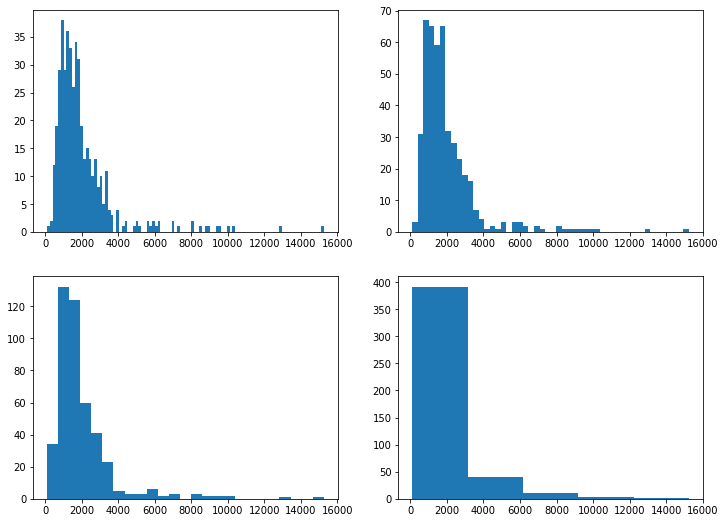

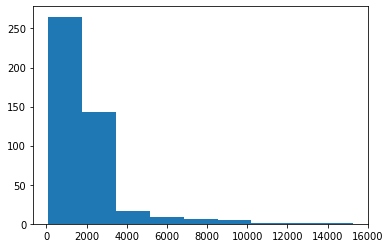

Sturges interval: 1683.33


In [ ]:
#code
import numpy as np
import pandas as pd
from scipy.stats import skew
import matplotlib.pyplot as plt
# from google.colab import files
# uploaded = files.upload()

ceo_data = pd.read_excel('ceo.xls', sheet_name = 'ceo')
salary = ceo_data["salary"].tolist()
salary.sort()

f,ax = plt.subplots(2, 2, figsize=(12, 9))
ax[0][0].hist(salary, bins=100)
ax[0][1].hist(salary, bins=50)
ax[1][0].hist(salary, bins=25)
ax[1][1].hist(salary, bins=5)
plt.show()

n = 1 + int(np.log(len(salary)) / np.log(2)) #sturges
plt.hist(salary, bins=n)
plt.show()
print(f'Sturges interval: {(salary[len(salary) - 1] - salary[0])/n:.2f}')

**Задача 5.**
Существуют методы, которые помогают нам сделать распределение выборки более симметричным. Рассмотрим натуральный логарифм ```salary```: ```ln(salary)```. Постройте гистограмму (и Box-plot) и сравните их с распределением  исходных данных. Вычислите среднее значение и медиану. Какой вывод можно сделать на основании этих двух характеристик о распределении  ```ln(salary)```?  Дайте экономическую интерпретацию ```ln(salary)```.


Решение задачи оценивается в [2 бала].

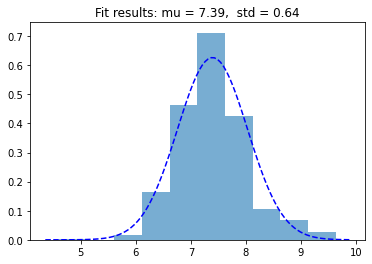

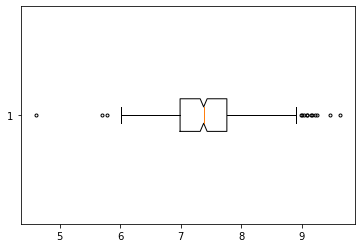

Salary min=100 max=15250
Log salary min=4.605170185988092 max=9.632334782035558
Average: 7.391898315751774
Median: 7.3777589082278725
Skewness: 0.3047327684051285


In [ ]:
#code
import numpy as np
import pandas as pd
from scipy.stats import norm, skew
import matplotlib.pyplot as plt
# from google.colab import files
# uploaded = files.upload()

ceo_data = pd.read_excel('ceo.xls', sheet_name = 'ceo')
salary = ceo_data["salary"].tolist()
log_salary = np.log(salary)

mu, std = norm.fit(log_salary)
plt.hist(log_salary, bins='sturges', density=True, alpha=0.6)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)

p = norm.pdf(x, mu, std)
plt.plot(x, p, 'b', linestyle='--')

title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)
plt.show()

plt.boxplot(log_salary, vert=False, notch=True, sym='.', whis=1.5)
plt.show()

print(f'Salary min={np.min(salary)} max={np.max(salary)}')
print(f'Log salary min={np.min(log_salary)} max={np.max(log_salary)}')
print(f'Average: {np.average(log_salary)}')
print(f'Median: {np.median(log_salary)}')
print(f'Skewness: {skew(log_salary)}')

Гистограмма и ящик для логарифма ЗП более симметричны, то есть зависимость от логарифма зарплаты больше соответствует нормальному распределению, чем от самой зарплаты. Можно говорить о сравнении порядков ЗП. Например, если сравнить минимальную и максимальную зарплаты, в линейной шкале они отличаются в 152.5 раза, а в логарифмической - на 5 порядков (натуральный логарифм).

Аналогично, если использовать десятичный логарифм, минимальная и максимальная зарплаты будут отличаться на 2.2 порядка.

**Задача 6.** Немного разберемся с коэфициетами корреляции [Пирсона](http://www.machinelearning.ru/wiki/index.php?title=%D0%9A%D0%BE%D1%8D%D1%84%D1%84%D0%B8%D1%86%D0%B8%D0%B5%D0%BD%D1%82_%D0%BA%D0%BE%D1%80%D1%80%D0%B5%D0%BB%D1%8F%D1%86%D0%B8%D0%B8_%D0%9F%D0%B8%D1%80%D1%81%D0%BE%D0%BD%D0%B0) и [Спирмана](http://www.machinelearning.ru/wiki/index.php?title=%D0%9A%D0%BE%D1%8D%D1%84%D1%84%D0%B8%D1%86%D0%B8%D0%B5%D0%BD%D1%82_%D0%BA%D0%BE%D1%80%D1%80%D0%B5%D0%BB%D1%8F%D1%86%D0%B8%D0%B8_%D0%A1%D0%BF%D0%B8%D1%80%D0%BC%D0%B5%D0%BD%D0%B0).



1.   Пусть $U$ и $V$ случайный величины из нормального распределения $N(0, 1)$. Обозначим $U^* = U$ и $ V^* = pU + \sqrt{1 - p^2}V$. Докажите, что $Corr(U^*, V^*) = p.$ $p$ - может принимать значение от 0 до 1.   
2.   Получите 100 реализаций случайных величин $ U^*$ и $ V^* $ для разных $p$. Постройте графики зависмости  $ U^*$ от $ V^* $ для каждого $p$. Посчитайте значения коэфициентов корреляции Пирсона и Спирмана для каждого из случаев. Оцените на сколько сильно практические значения коэфициентов отличаются от теоретически расчитанных.
3.  Примените монотонно нелинейную трансформацию к $ V^* $, на пример ```ln```, ```exp``` или возведение в квадрат. На сколько сильно применение нелинейности повлияло на коэфициентов корреляции Пирсона? а Спирмана?

Решение задачи оценивается в [6 балов].



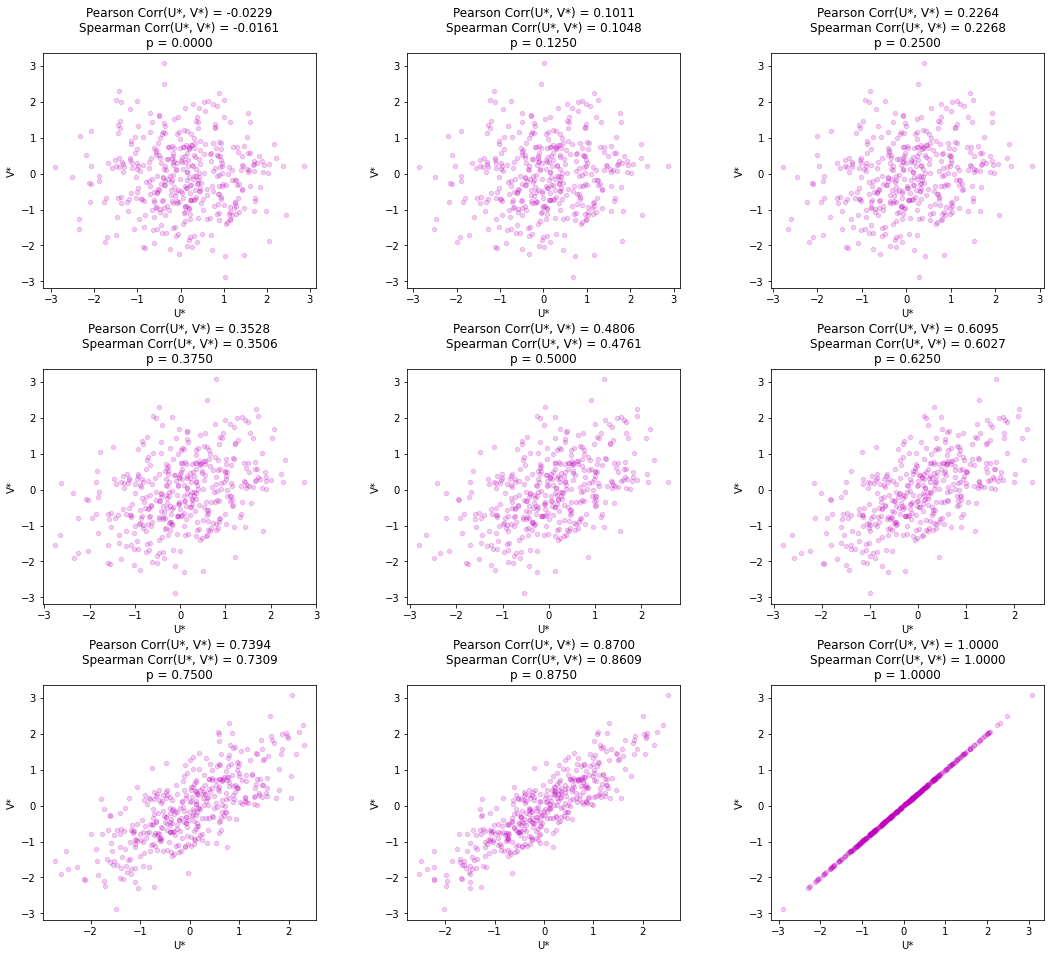

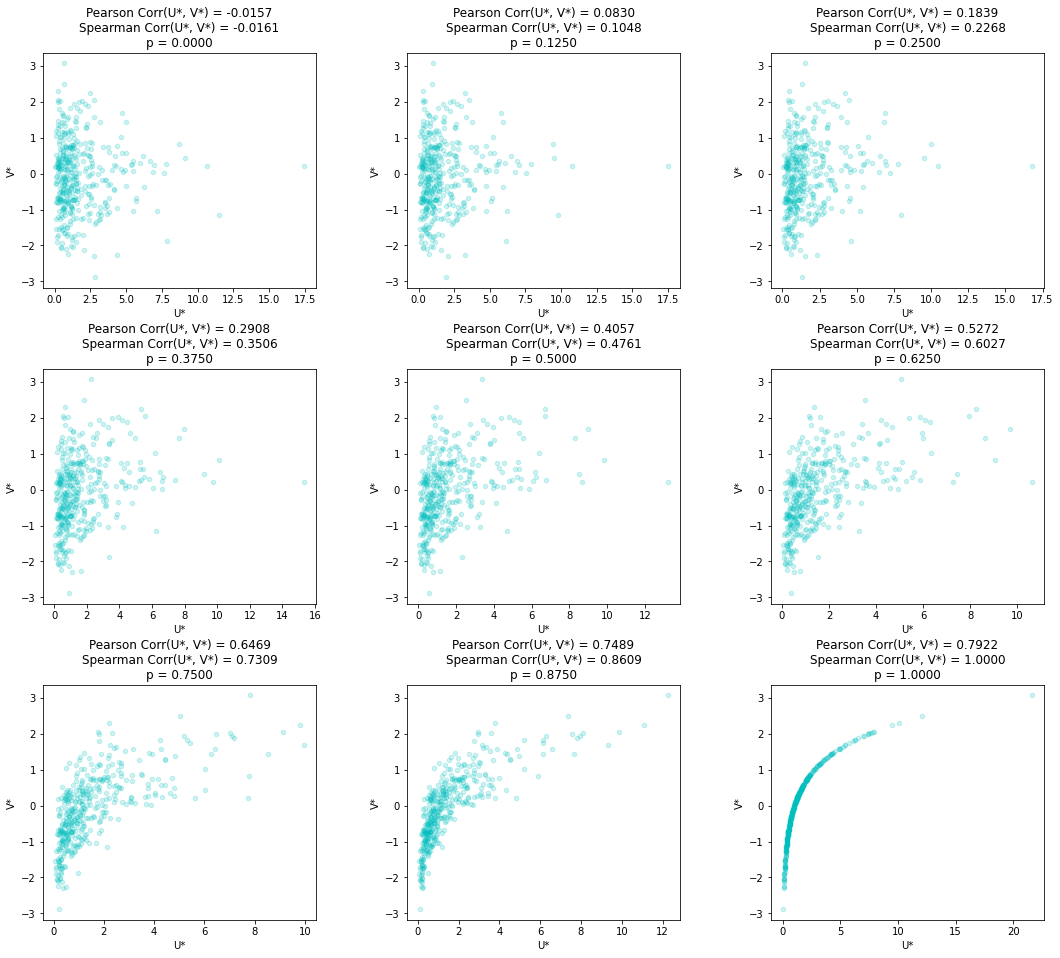

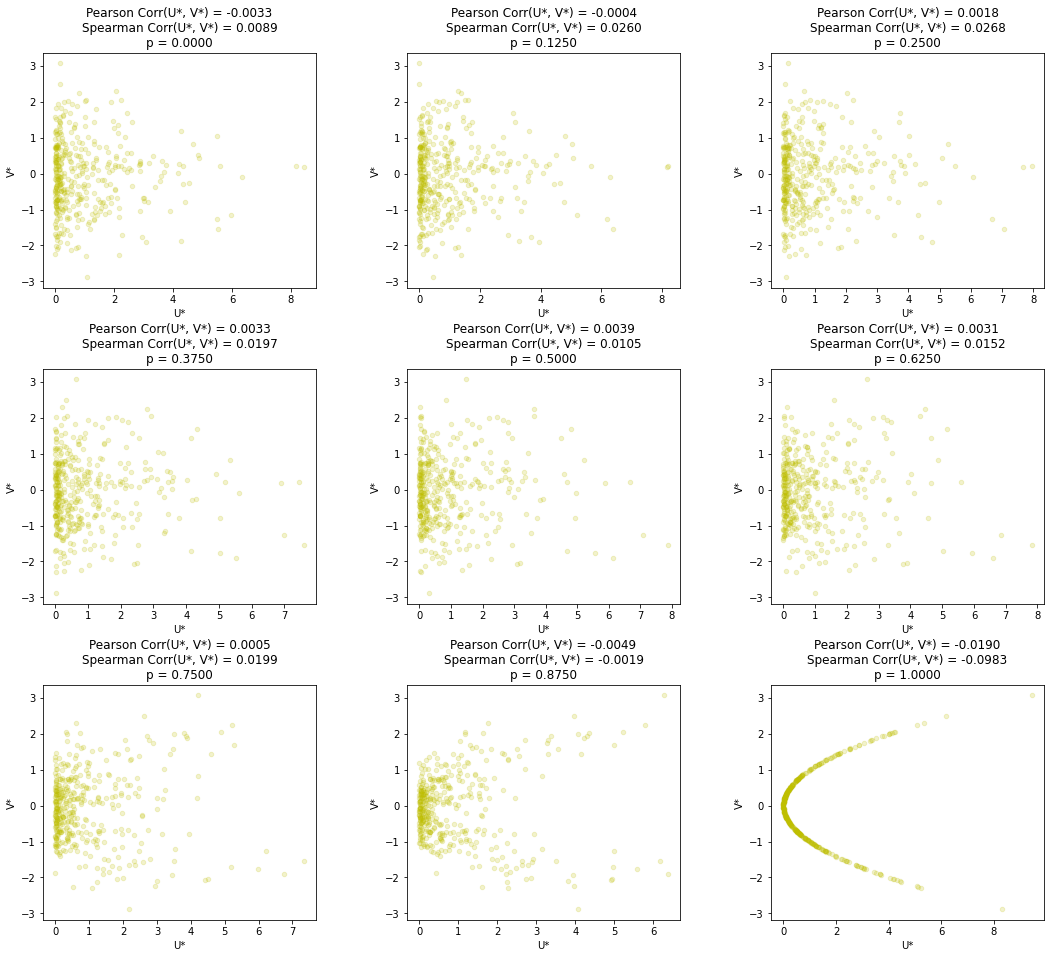

In [ ]:
#code
import numpy as np
from scipy import stats

u = np.random.normal(0, 1, 400)
v = np.random.normal(0, 1, 400)
u_star = u

f, ax = plt.subplots(3, 3, figsize=(16, 14))
f.tight_layout(pad=6.0)

for i, p in enumerate(np.linspace(0, 1, 9)):
  v_star = p*u + np.sqrt(1-p*p) * v
  rho = np.corrcoef(u_star, v_star)
  rho_sp, _ = stats.spearmanr(u_star, v_star)
  x, y = divmod(i, 3)
  ax[x][y].scatter(v_star, u_star, s=20, c='m', alpha=0.2)
  ax[x][y].title.set_text('Pearson Corr(U*, V*) = {0:0.4f}'.format(rho[0, 1]) + '\n' + 'Spearman Corr(U*, V*) = {0:0.4f}'.format(rho_sp) + '\n' + 'p = {0:0.4f}'.format(p))
  ax[x][y].set(xlabel="U*")
  ax[x][y].set(ylabel="V*")
plt.show()

f, ax = plt.subplots(3, 3, figsize=(16, 14))
f.tight_layout(pad=6.0)
for i, p in enumerate(np.linspace(0, 1, 9)):
  v_star = np.exp(p*u + np.sqrt(1-p*p) * v)
  rho = np.corrcoef(u_star, v_star)
  rho_sp, _ = stats.spearmanr(u_star, v_star)
  x, y = divmod(i, 3)
  ax[x][y].scatter(v_star, u_star, s=20, c='c', alpha=0.2)
  ax[x][y].title.set_text('Pearson Corr(U*, V*) = {0:0.4f}'.format(rho[0, 1]) + '\n' + 'Spearman Corr(U*, V*) = {0:0.4f}'.format(rho_sp) + '\n' + 'p = {0:0.4f}'.format(p))
  ax[x][y].set(xlabel="U*")
  ax[x][y].set(ylabel="V*")
plt.show()

f, ax = plt.subplots(3, 3, figsize=(16, 14))
f.tight_layout(pad=6.0)
for i, p in enumerate(np.linspace(0, 1, 9)):
  v_star = np.power(p*u + np.sqrt(1-p*p) * v, 2)
  rho = np.corrcoef(u_star, v_star)
  rho_sp, _ = stats.spearmanr(u_star, v_star)
  x, y = divmod(i, 3)
  ax[x][y].scatter(v_star, u_star, s=20, c='y', alpha=0.2)
  ax[x][y].title.set_text('Pearson Corr(U*, V*) = {0:0.4f}'.format(rho[0, 1]) + '\n' + 'Spearman Corr(U*, V*) = {0:0.4f}'.format(rho_sp) + '\n' + 'p = {0:0.4f}'.format(p))
  ax[x][y].set(xlabel="U*")
  ax[x][y].set(ylabel="V*")
plt.show()



## Часть 2.  Regression. 📈

В этом разделе мы будем работать с датасетом ```telco.txt```. Перед началом работы считайте его воспользовавшись библиотекой ```pandas```.

Описание датасета ```telco.txt```:

Поставщик услуг телефонной связи стремились снизить уровень оттока клиентов и анализирует данные об использование услуг 1000 клиентов. В исследовании использовались следующие переменные:


```
tenure - month a client

age - age in years

marital status - marital status (1 - married, 0 - single)

address - years at the current address

income - household income in TEuro

ed - education (5 categories: Did not complete high school; High school degree; Some college; College degree; Post-undergraduate degree)

retire - retired (0 - no, 1 - yes)

gender - gender (0 - male, 1 - female)

longmon - long distance calls last month

wiremon - internet use last month

churn - 1 if the contract was terminated last month and 0 else
```

Целевой переменной считается long distance calls last month.



In [ ]:
#read telco.txt
import pandas as pd
from google.colab import files
uploaded = files.upload()

telco_data = pd.read_csv('telco.txt', sep='\t', skiprows=(0), header=(0))
print(type(telco_data))
print(telco_data)

Saving telco.txt to telco.txt
<class 'pandas.core.frame.DataFrame'>
      tenure  age    marital  address  ...  gender longmon  wiremon churn
1         13   44    Married        9  ...    Male    3.70      0.0   Yes
2         11   33    Married        7  ...    Male    4.40     35.7   Yes
3         68   52    Married       24  ...  Female   18.15      0.0    No
4         33   33  Unmarried       12  ...  Female    9.45      0.0   Yes
5         23   30    Married        9  ...    Male    6.30      0.0    No
...      ...  ...        ...      ...  ...     ...     ...      ...   ...
996       10   39  Unmarried        0  ...  Female    3.00      0.0    No
997        7   34  Unmarried        2  ...  Female    4.65      0.0    No
998       67   59  Unmarried       40  ...  Female   26.75     65.8    No
999       70   49  Unmarried       18  ...  Female   25.60      0.0    No
1000      50   36    Married        7  ...  Female   13.15      0.0   Yes

[1000 rows x 12 columns]


**Задача 7.**
Внимательно посмотрите на определения переменных и проанализируйте, какие из них могут потребовать дополнительной обработки. Рассмотрим для примера переменную ```ed```. Есть две возможности, как переменная ```ed``` может быть включена в модель (одна с [фиктивными переменными](https://ru.wikipedia.org/wiki/%D0%A4%D0%B8%D0%BA%D1%82%D0%B8%D0%B2%D0%BD%D0%B0%D1%8F_%D0%BF%D0%B5%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D0%B0%D1%8F), другая без фиктивных). Подумайте об этих двух подходах и предложите, какой подход более уместен. Многие переменные являются численными - посмотрите на их распределения и подумайте, какие нелинейные трансформации стоило бы к ним применить? Мотивируйте свое решение.

Целевая переменная ```wiremon``` показывает очень специфический шаблон. Как бы вы приняли это во внимание?

Решение задачи оценивается в [2 бала].

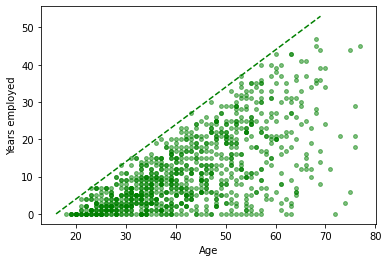

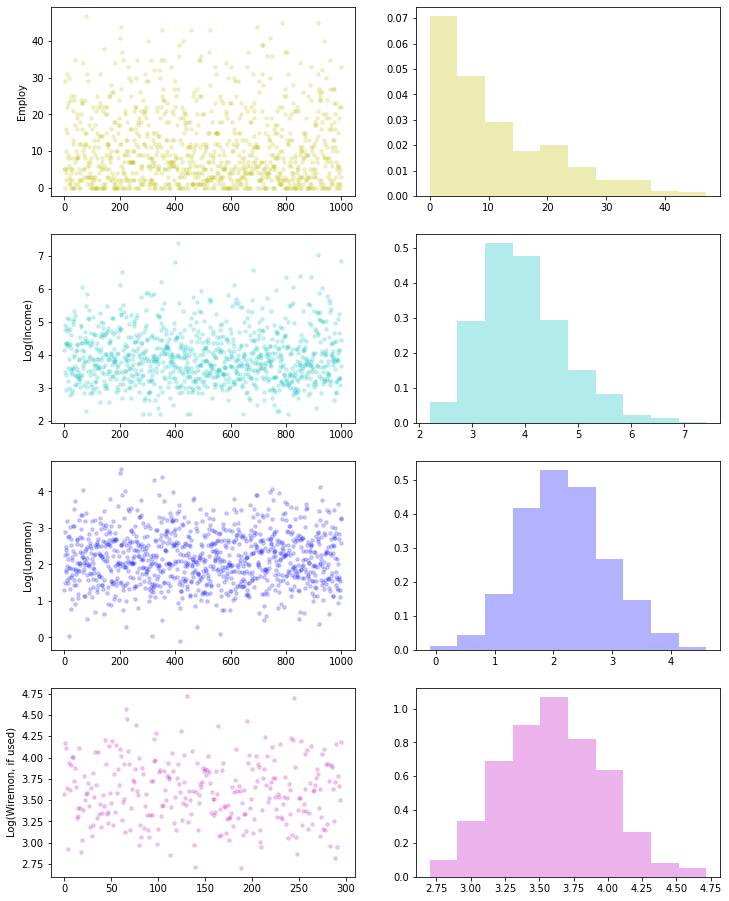

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

age = telco_data["age"].tolist()
employ = telco_data["employ"].tolist()
plt.scatter(age, employ, s=15, c='g', alpha=0.5)
plt.xlabel("Age")
plt.ylabel("Years employed")
size = len(telco_data)
x = range(16, 70, 1)
y = [x_i-16 for x_i in x] # {employed} <= {age}-16
plt.plot(x, y, 'g--')
plt.show()

income = telco_data["income"].tolist()
longmon = telco_data["longmon"].tolist()
wiremon = telco_data["wiremon"].tolist()
wiremon_if_used = [w for w in wiremon if w > 0]

f,ax = plt.subplots(4, 2, figsize=(12, 16))
ax[0][0].scatter(range(len(employ)), employ, s=12, c='y', alpha=0.2)
ax[0][0].set(ylabel='Employ')
ax[0][1].hist(employ, density=True, color='y', alpha=0.3)

# log is more informative since the major part of the data is very close to 0
ax[1][0].scatter(range(size), np.log(income), s=12, c='c', alpha=0.2)
ax[1][0].set(ylabel='Log(Income)')
ax[1][1].hist(np.log(income), density=True, color='c', alpha=0.3)

ax[2][0].scatter(range(size), np.log(longmon), s=12, c='b', alpha=0.2)
ax[2][0].set(ylabel='Log(Longmon)')
ax[2][1].hist(np.log(longmon), density=True, color='b', alpha=0.3)

# log is only informative if the value is not 0 (0 ~ no use of internet at all)
ax[3][0].scatter(range(len(wiremon_if_used)), np.log(wiremon_if_used), s=12, c='m', alpha=0.2)
ax[3][0].set(ylabel='Log(Wiremon, if used)')
ax[3][1].hist(np.log(wiremon_if_used), density=True, color='m', alpha=0.3)

# ax[4][0].scatter(range(len(wiremon)), wiremon, s=12, c='y', alpha=0.2)
# ax[4][0].set(ylabel='wiremon')
plt.show()

**решение**

*   Для включения переменной ed в уравнение регрессии можно ввести 4 фиктивные переменные для описания *уровня образования* (качественный признак - High school degree / Some college / College degree / Post-undergraduate degree). Отсутствие образования не требует отдельной переменной (чтоб избежать мультиколлинеарности)
*   Можно также сопоставить возможные значения *уровня образования* с числами
*   *Возраст и опыт работы* можно связать используя переменную взаимодействия
*   *Звонки и прибыль* удобно перевести в логарифмический масштаб, чтоб приблизить величины к нормальному распределению (расположить данные равномернее при крайних минимальных и крайних максимальных значениях)
*   Логарифм применим и для *использования интернета*, но он не может быть посчитан для нулевых значений (которые можно интерпретировать например как отсутствие подключения вообще, качественный признак). Добавим переменную для разделения двух моделей - с использованием интернета и без него: $X_{wiremon-not-used}$

$X_{wiremon-not-used} = \begin{cases}
0, wiremon > 0 \\
1, wiremon \leq 0
 \end{cases}$

Вариант 1:
$\ln(Y_{longmon}) = \beta_0 + \beta_1 X_{ed1} + \beta_2 X_{ed2} + \beta_3 X_{ed3} + \beta_4 X_{ed4} + \beta_{w, x>0}\ln(X_{wiremon-if-used}) + \beta_{w, x\leq0} X_{wiremon-not-used} + \beta_i \ln(X_{income}) + \beta_t X_{tenure} + \beta_a X_{age} + \beta_e X_{employ} + \beta_{add} X_{address} + \beta_m X_{marital} + \beta_r X_{retire} + \beta_g X_{gender} + \beta_c X_{churn}$

Вариант 2:
$\ln(Y_{longmon}) = \beta_0 + \beta_{ed} X_{ed} + \beta_{w, x>0}\ln(X_{wiremon-if-used}) + \beta_{w, x\leq0} X_{wiremon-not-used} + \beta_i \ln(X_{income}) + \beta_t X_{tenure} + \beta_a X_{age} + \beta_e X_{employ} + \beta_{add} X_{address} + \beta_m X_{marital} + \beta_r X_{retire} + \beta_g X_{gender} + \beta_c X_{churn}$

Вариант 3:
$\ln(Y_{longmon}) = \beta_0 + \beta_{ed} X_{ed} + \beta_w X_{wiremon} + \beta_i \ln(X_{income}) + \beta_t X_{tenure} + \beta_a X_{age} + \beta_e X_{employ} + \beta_{add} X_{address} + \beta_m X_{marital} + \beta_r X_{retire} + \beta_g X_{gender} + \beta_c X_{churn}$

**Задача 8.** После всех применненых операций в задаче 7 - натренируйте модель линейной регресси для предсказания переменной ```longmon```. Для начала натренируйте модель с использованием библиотеки [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). После этого натренируйте вторую модель, но уже с использованием библиотеки [statmodels](https://www.statsmodels.org/stable/regression.html). Отличаются ли полученные коэфициенты в зависимости от выбраной библиотеки?

Решение задачи оценивается в [2 бала].



With linear Wiremon:
       Actual  Predicted
994  1.648659   1.937004
860  1.619388   1.415871
299  1.816452   2.494822
554  1.887070   2.703785
673  2.939162   3.213971
['tenure: 0.027617', 'age: -0.003687', 'marital: 0.074282', 'address: 0.003905', 'income: 0.004599', 'ed: 0.019008', 'employ: 0.002962', 'retire: 0.211521', 'gender: 0.001180', 'wiremon: 0.000267', 'churn: -0.020809']
Mean Absolute Error: 0.343349
Mean Squared Error: 0.184420
Root Mean Squared Error: 0.429441
R^2 Error: 0.660633


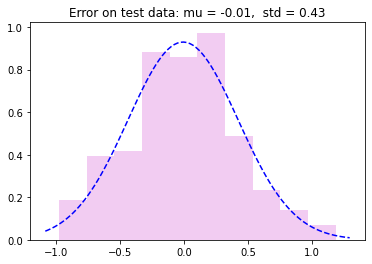


With log Wiremon and Wiremon-not-used:
       Actual  Predicted
994  1.648659   1.937878
860  1.619388   1.413371
299  1.816452   2.494203
554  1.887070   2.703681
673  2.939162   3.214545
['tenure: 0.027668', 'age: -0.003690', 'marital: 0.074199', 'address: 0.003902', 'income: 0.004656', 'ed: 0.018965', 'employ: 0.002949', 'retire: 0.211651', 'gender: 0.000918', 'wiremon: -0.010304', 'churn: -0.021058', 'wiremon_not_used: -0.050809']
Mean Absolute Error: 0.343337
Mean Squared Error: 0.184562
Root Mean Squared Error: 0.429607
R^2 Error: 0.660371


In [ ]:
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
from scipy.stats import norm, skew

oe = OrdinalEncoder(categories=[['Unmarried', 'Married'], ['Did not complete high school', 'High school degree', 'Some college', 'College degree', 'Post-undergraduate degree'], ['No', 'Yes'], ['Female', 'Male'], ['No', 'Yes']])

telco_data_copy = telco_data.copy()
telco_data_copy[["marital", "ed", "retire", "gender", "churn"]] = oe.fit_transform(telco_data_copy[["marital", "ed", "retire", "gender", "churn"]])

y = np.log(telco_data_copy['longmon'])
X = telco_data_copy.drop('longmon', 1)
X["income"] = np.log(X["income"])

# Option 2 - with linear Wiremon
print("\n" + "With linear Wiremon:")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df.head())

weights = zip(X.columns.values.tolist(), reg.coef_)
print([w[0] + ": {0:0.6f}".format(w[1]) for w in weights])
print('Mean Absolute Error:', "{0:0.6f}".format(metrics.mean_absolute_error(y_test, y_pred)))
print('Mean Squared Error:', "{0:0.6f}".format(metrics.mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Error:', "{0:0.6f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
print('R^2 Error:', "{0:0.6f}".format(metrics.r2_score(y_test, y_pred)))

plt.hist(y_pred-y_test, density=True, color='m', alpha=0.2)
mu, std = norm.fit(y_pred-y_test)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)

p = norm.pdf(x, mu, std)
plt.plot(x, p, 'b', linestyle='--')

plt.title("Error on test data: mu = %.2f,  std = %.2f" % (mu, std))
plt.show()

# Option 3 - with log Wiremon and Wiremon-not-used
print("\n" + "With log Wiremon and Wiremon-not-used:")
wiremon = telco_data_copy["wiremon"].tolist()
X['wiremon'] = [np.log(w) if w > 0 else 0 for w in wiremon]
X['wiremon_not_used'] = [0 if w > 0 else 1 for w in wiremon]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df.head())

weights = zip(X.columns.values.tolist(), reg.coef_)
print([w[0] + ": {0:0.6f}".format(w[1]) for w in weights])
print('Mean Absolute Error:', "{0:0.6f}".format(metrics.mean_absolute_error(y_test, y_pred)))
print('Mean Squared Error:', "{0:0.6f}".format(metrics.mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Error:', "{0:0.6f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
print('R^2 Error:', "{0:0.6f}".format(metrics.r2_score(y_test, y_pred)))

In [ ]:
import numpy as np
from pandas import DataFrame
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
import statsmodels.api as sm

telco_data_copy = telco_data.copy()

y = telco_data_copy['longmon']
X = telco_data_copy.drop('longmon', 1)
X = sm.add_constant(X)

print('\n--------------- ALL LINEAR ---------------')
model = smf.ols(formula='longmon ~ tenure + age + marital + address + income + ed + employ + retire + gender + wiremon + churn', data=telco_data_copy).fit()

predictions = model.predict(X)
print(model.summary())

print('\n--------------- LONGMON AND INCOME LOG SCALED TRAIN ---------------')
X_dum = pd.get_dummies(X, columns=["marital", "ed", "retire", "gender", "churn"], drop_first=True)
X_dum['income'] = np.log(X_dum['income'])
y = np.log(y)
X_train, X_test, y_train, y_test = train_test_split(X_dum, y, test_size=0.1)
model = sm.OLS(y_train.astype(float), X_train.astype(float)).fit()

predictions = model.predict(X_dum)
print(model.summary())

# --------------- LONGMON AND INCOME LOG SCALED ---------------
# model = smf.ols(formula='np.log(longmon) ~ tenure + age + marital + address + np.log(income) + ed + employ + retire + gender + wiremon + churn', data=telco_data_copy).fit()

# predictions = model.predict(X)
# print(model.summary())



--------------- ALL LINEAR ---------------
                            OLS Regression Results                            
Dep. Variable:                longmon   R-squared:                       0.557
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     88.28
Date:                Sun, 21 Nov 2021   Prob (F-statistic):          7.72e-163
Time:                        22:58:34   Log-Likelihood:                -3350.2
No. Observations:                1000   AIC:                             6730.
Df Residuals:                     985   BIC:                             6804.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

**Задача 9.** Приведите экономическую интерпретацию полученых весов для параметров ```address```, ```ed``` и ```retire```. Помните о возможных преобразованиях переменных, которые вы сделали.

Решение задачи оценивается в [2 бала].

**решение**

'address: 0.0039', 'ed: 0.0190', 'retire: 0.2115'
retire является самой существенной характеристикой, education тоже существенно влияет, и обе эти переменные могут быть ключевыми при исследовании целевой аудитории бизнеса.

Вариант 2:

['tenure: 0.027668', 'age: -0.003690', 'marital: 0.074199', 'address: 0.003902', 'income: 0.004656', 'ed: 0.018965', 'employ: 0.002949', 'retire: 0.211651', 'gender: 0.000918', 'wiremon: -0.010304', 'churn: -0.021058', 'wiremon_not_used: -0.050809']

$\ln(Y_{longmon}) = 0.018965 X_{ed} - 0.010304 \ln(X_{wiremon-if-used}) - 0.050809 X_{wiremon-not-used} + 0.004656 \ln(X_{income}) + 0.027668 X_{tenure} - 0.003690 X_{age} + 0.002949 X_{employ} + 0.003902 X_{address} + 0.074199 X_{marital} + 0.211651 X_{retire} + 0.000918 X_{gender} + 0.021058 X_{churn}$

$Y_{longmon} = \frac{X_{income}^{0.004656}}{X_{wiremon-if-used}^{0.010304}} * \exp(0.018965 X_{ed} - 0.050809 X_{wiremon-not-used} + 0.027668 X_{tenure} - 0.003690 X_{age} + 0.002949 X_{employ} + 0.003902 X_{address} + 0.074199 X_{marital} + 0.211651 X_{retire} + 0.000918 X_{gender} + 0.021058 X_{churn})$

-----------------------------

Вариант 3:

['tenure: 0.027617', 'age: -0.003687', 'marital: 0.074282', 'address: 0.003905', 'income: 0.004599', 'ed: 0.019008', 'employ: 0.002962', 'retire: 0.211521', 'gender: 0.001180', 'wiremon: 0.000267', 'churn: -0.020809']

$\ln(Y_{longmon}) = 0.019008 X_{ed} + 0.000267 X_{wiremon} + 0.004599 \ln(X_{income}) + 0.027617 X_{tenure} - 0.003687 X_{age} + 0.002962 X_{employ} + 0.003905 X_{address} + 0.074282 X_{marital} + 0.211521 X_{retire} + 0.001180 X_{gender} - 020809 X_{churn}$

$Y_{longmon} = X_{income}^{0.004599} * \exp(0.019008 X_{ed} + 0.000267 X_{wiremon} + 0.027617 X_{tenure} - 0.003687 X_{age} + 0.002962 X_{employ} + 0.003905 X_{address} + 0.074282 X_{marital} + 0.211521 X_{retire} + 0.001180 X_{gender} - 020809 X_{churn})$

**Задача 10.** Посчитайте значение $R^2$ для обоих моделей.  Для каждого наблюдения посчитайте чему равна ошибка $\varepsilon_i $ предсказания. Постройте график распределения ошибки. Чему равно среднее значение ошибки? А дисперсия ошибки $\sigma^2$?  Верно ли предположение, что ошибка распределенна нормально?

Решение задачи оценивается в [2 бала].

Дополнительно за 1 бал, можно ответить на вопрос о распределении ошибки строго. Для этого нужно воспользоваться [критерием нормальности](https://ru.wikipedia.org/wiki/%D0%9A%D1%80%D0%B8%D1%82%D0%B5%D1%80%D0%B8%D0%B8_%D0%BD%D0%BE%D1%80%D0%BC%D0%B0%D0%BB%D1%8C%D0%BD%D0%BE%D1%81%D1%82%D0%B8). Дополнительно про то как это реализовать в [коде](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html).

**решение**

Сравним модели с линейным масштабом wiremon, но логарифмическим для longmon и income:
*   sklearn: 0.661
*   statmodels: 0.718

При этом для моделей statmodels:
*   все переменные в линейном масштабе: 0.557
*   longmon и income нормализованны: 0.718

Выше построена гистограмма для модели sklearn, где ошибка на тестовых данных показывает нормлаьное распределение с параметрами $\mu = -0.01$, $\sigma = 0.43$ (standard deviation), ${\sigma}^2 = 0.1849$ (variance)

**Задача 11.** В лекции мы говорили о том, что параметры регрессии также являются случайными величинами. В задаче 8 мы получили некоторые коэфициенты - реализации этих случайных величин. Каждый коэфициент является случайной величиной из нормального распределения с математическим ожиданием равным реальному значению коэфициента и дисперсией $\sigma^2(X^TX)^{-1}$. Найдите параметры дисперсии распределения коэфициентов. Расчитайте [95%-доверительный интервал](http://cito-web.yspu.org/link1/metod/theory/node40.html) для переменных ```address``` и ```income```. Дайте экономическое обоснование этим интервалам.

Решение задачи оценивается в [3 бала].

In [ ]:
#code

**решение**

Для модели statmodels выводятся значения **t** (полная таблица - в задаче 8):
*   address: 2.267, интервал (0.00397; 0.00423), мат.ожидание 0.0041
*   income: 0.954, интервал (0.0248; 0.0284), мат. ожидание 0.0266

Это диапазон, в который с 95% вероятностью попадает значения самого коэффициента при достаточно большой выборке.


**Задача 12.** Посмотрите на значения коэфициентов полученых вашими моделями. Некоторые из них имеют очень маленькие значения, это может свидетельствовать о их незначительности. (тут подумайте, а стоит ли нормализовать данные перед тем как подавать их в модель? 😁). Попробуйте получить модель меньшего размера но с похожим качеством. Для этого постройте модели по разным наборам используемых признаков, выберите лучшую модель. **Обратите внимание**, что лучшую модель нужно выбирать не по значению параметра $R^2$, а по информационному критерию. Выберите по две лучшие модели на основании критериев ```AIC``` и ```BIC```. Посчитайте для них значения $R^2$. Какой из критериев лучше подходит для отбора моделей ```AIC``` или ```BIC```?

Решение задачи оценивается в [3 бала].

In [ ]:
#code

**решение**

**Задача 13.** Посмотрите на распределения признаков. Присутствуют ли наблюдения с аномально большими/маленькими значениями? Найдите их и выбросите. Для этого воспользуйтесь любым критерием на аномальность: значение больше/меньше чем среднее $ \pm 3 \cdot \sigma$ или слишком большое растояние [Кука](https://uk.wikipedia.org/wiki/%D0%92%D1%96%D0%B4%D1%81%D1%82%D0%B0%D0%BD%D1%8C_%D0%9A%D1%83%D0%BA%D0%B0). Натренируйте модель линейной регрессии без аномалий. Улучшилось ли значение $R^2$ и почему?  

Решение задачи оценивается в [3 бала].

In [ ]:
#code
import numpy as np
from pandas import DataFrame
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
import statsmodels.api as sm

telco_data_copy = telco_data.copy()
line_IDs_to_be_removed = []

def anomalies_finder(features: [str]):
  for feature in features:
    std = np.std(telco_data_copy[feature])
    mean = np.mean(telco_data_copy[feature])
    for i, el in enumerate(telco_data_copy[feature]):
      if np.abs(el - mean) > 3*std or np.abs(el - mean) < -3*std:
        line_IDs_to_be_removed.append(i)

anomalies_finder(['longmon', 'tenure', 'age', 'address', 'income', 'employ', 'wiremon'])

telco_data_copy.drop(line_IDs_to_be_removed, inplace=True)
print('Removed lines: ' + str(np.sort(line_IDs_to_be_removed)))

y = telco_data_copy['longmon']
X = telco_data_copy.drop('longmon', 1)
X = sm.add_constant(X)

print('\n--------------- ALL LINEAR ---------------')
model = smf.ols(formula='longmon ~ tenure + age + marital + address + income + ed + employ + retire + gender + wiremon + churn', data=telco_data_copy).fit()

predictions = model.predict(X)
print(model.summary())

# DIDN'T HELP =(
# R^2 = 0.558

Removed lines: [ 63  67  67  78 165 199 199 206 206 206 208 208 218 234 236 241 253 275
 280 287 325 343 349 350 351 351 391 401 409 413 440 458 465 465 468 526
 590 595 611 613 670 671 680 688 691 695 695 697 709 742 751 754 775 784
 784 799 825 849 862 892 917 917 922 930 931 997]

--------------- ALL LINEAR ---------------
                            OLS Regression Results                            
Dep. Variable:                longmon   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.552
Method:                 Least Squares   F-statistic:                     83.91
Date:                Mon, 22 Nov 2021   Prob (F-statistic):          5.85e-154
Time:                        00:04:30   Log-Likelihood:                -3176.4
No. Observations:                 944   AIC:                             6383.
Df Residuals:                     929   BIC:                             6456.
Df Model:                          14   